In [1]:
# The term you are looking for to find the best choice of parameters when you have data values:
# supervised dimensionality reduction

%pylab inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [3]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)

import constants
imp.reload(constants)
from constants import *

# Get saved training-set waveforms

In [4]:
# trainset = ws.HDF5WaveformSet('../data/flowp00015/dh_training_set_lhd_uncsamp.hdf5')
# Bamp_filename = '../data/flowp00015/Bamp_lhd_uncsamp.hdf5'
# Bphase_filename = '../data/flowp00015/Bphase_lhd_uncsamp.hdf5'
# amp_gp_filename = '../data/flowp00015/amp_gp_lhd_uncsamp.hdf5'
# phase_gp_filename = '../data/flowp00015/phase_gp_lhd_uncsamp.hdf5'

trainset = ws.HDF5WaveformSet('../data/flowp00015/dh_training_set_lhd_uncsamp_rand.hdf5')
Bamp_filename = '../data/flowp00015/Bamp_lhd_uncsamp_rand.hdf5'
Bphase_filename = '../data/flowp00015/Bphase_lhd_uncsamp_rand.hdf5'
amp_gp_filename = '../data/flowp00015/amp_gp_lhd_uncsamp_rand.hdf5'
phase_gp_filename = '../data/flowp00015/phase_gp_lhd_uncsamp_rand.hdf5'

431


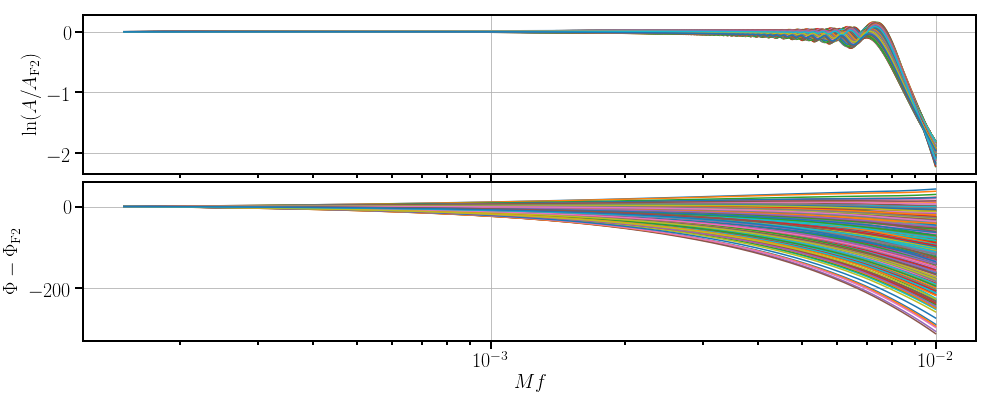

In [5]:
print len(trainset)

fig, (ax1, ax2) = wave.plot_waveforms_fd([trainset[i] for i in range(0, len(trainset), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate reduced Bases for amplitude and phase

In [6]:
epsilon = 1.0e-7

# Initialize the ReducedBasis object
add = surrogate.add_amp
subtract = surrogate.subtract_amp
scalar_multiply = surrogate.scalar_multiply_amp
inner_product = surrogate.inner_product_amp

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbamprun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbamprun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.0452128614297
0.00694435680942
0.00508494775753
0.00122086056004
0.000995443163874
0.00059383020483
0.000265655751623
0.000187910792445
0.00011213688358
9.1133936599e-05
8.26453589403e-05
4.42328705069e-05
3.57071023408e-05
3.11147924251e-05
3.00842176649e-05
1.64336346269e-05
1.32058318046e-05
1.0280078693e-05
8.35452862447e-06
5.22578511586e-06
5.11416005122e-06
4.65076794198e-06
4.51770054144e-06
4.26952095445e-06
3.45873817631e-06
2.52545269219e-06
1.61086352335e-06
1.53830963467e-06
1.53786224244e-06
1.46701253068e-06
1.1235282199e-06
9.88906735166e-07
9.86051068352e-07
9.00885952837e-07
7.22860178715e-07
6.31313514021e-07
5.65353647342e-07
5.32391773889e-07
4.90552512722e-07
4.62116654054e-07
4.23658352178e-07
4.22408067968e-07
4.10763598468e-07
3.84485678517e-07
3.64500363337e-07
3.26183741239e-07
2.96359032648e-07
2.88572328588e-07
2.41295825099e-07
2.20386145222e-07
2.14540007093e-07
2.1198839617e-07
1.89693121988e-07
1.72770345586e-07
1.71907173052e-07
1.71690120565e-07

68


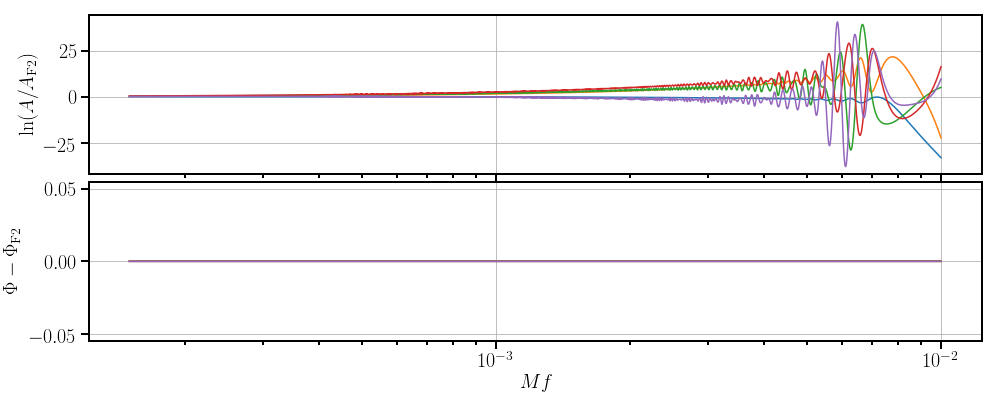

In [7]:
print len(rbamprun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbamprun.rb[:5])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

In [8]:
epsilon = 1.0e-11

# Initialize the ReducedBasis object
add = surrogate.add_phase
subtract = surrogate.subtract_phase
scalar_multiply = surrogate.scalar_multiply_phase
inner_product = surrogate.inner_product_phase

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbphaserun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbphaserun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.999940811687
0.022489362844
0.000471320724691
6.45437395278e-05
1.48768908093e-05
5.71985507414e-06
1.75238500855e-06
1.52393213726e-06
3.23057358309e-07
2.62315528188e-07
1.73459381414e-07
1.3084866457e-07
1.08547226318e-07
4.55728417226e-08
3.50963528239e-08
3.32116935065e-08
1.72261367393e-08
1.50472265759e-08
1.33277162639e-08
1.02988477746e-08
9.47630895975e-09
5.74295311306e-09
5.17807952072e-09
4.78206219068e-09
2.41993691752e-09
1.23863053147e-09
9.60834078967e-10
7.10731362652e-10
6.73111122396e-10
4.88243667718e-10
4.20014911739e-10
3.59049012744e-10
3.21954130023e-10
3.12105230549e-10
2.81219714182e-10
2.57617926991e-10
2.14256723474e-10
2.13814965733e-10
2.01007543943e-10
1.94895322103e-10
1.83424608835e-10
1.70891523155e-10
1.40232492285e-10
1.32506450257e-10
1.3169221269e-10
1.14205866986e-10
1.13203002527e-10
1.07182818176e-10
1.01479824544e-10
9.96970284106e-11
9.01244634477e-11
8.70945537912e-11
8.61440918598e-11
8.43567438125e-11
8.20548073932e-11
7.82582887382e

102


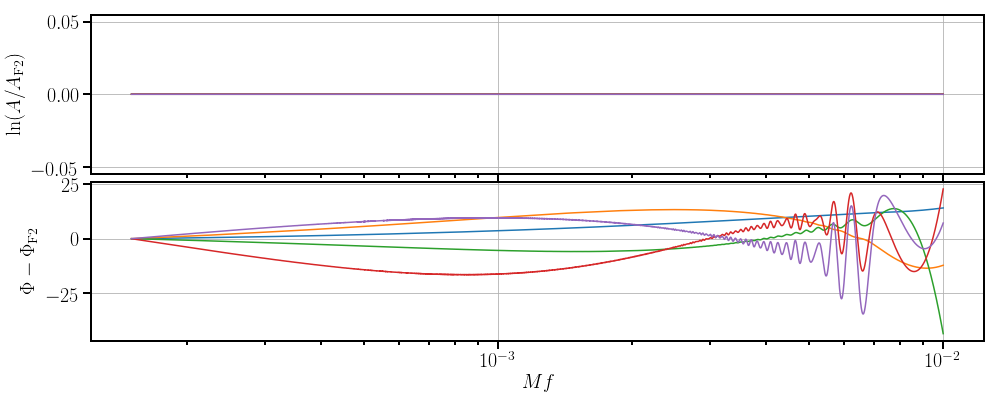

In [9]:
print len(rbphaserun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbphaserun.rb[:5])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Empirical interpolating functions

In [10]:
def save_empirical_interpolating_function_list(filename, b_j, mf_node):
    """Save the empirical interpolating functions as a HDF5WaveformSet object.
    The parameter value associated with each function b_j is the frequency of the node mf_j.
    
    Parameters
    ----------
    filename : string
    b_j : list of Waveform objects
        Empirical interpolating functions.
    mf_node : List of floats
        Frequency associated with each empirical interpolating function b_j.
    """
    bset = ws.HDF5WaveformSet(filename)
    
    for j in range(len(b_j)):
        # b_j don't have waveform parameters associated with them,
        # but you do want to save the node frequency node_mf 
        parameters = np.array([mf_node[j]])
        bset.set_waveform(j, b_j[j], parameters)
    
    bset.close()

In [11]:
# Use the first 20 bases
namp = 20
nphase = 20
empirical_node_indices_amp, Bamp_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbamprun.rb[:namp], 'amp')
empirical_node_indices_phase, Bphase_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbphaserun.rb[:nphase], 'phase')

In [12]:
# Get the frequencies Mf at each empirical node, and sort B's by the node frequency.

# amp
mf_amp = Bamp_j[0].x[empirical_node_indices_amp]
mf_Bamp_list = [[mf_amp[i], Bamp_j[i]] for i in range(len(mf_amp))]
mf_Bamp_list_sorted = sorted(mf_Bamp_list, key=lambda x: x[0])

# phase
mf_phase = Bphase_j[0].x[empirical_node_indices_phase]
mf_Bphase_list = [[mf_phase[i], Bphase_j[i]] for i in range(len(mf_phase))]
mf_Bphase_list_sorted = sorted(mf_Bphase_list, key=lambda x: x[0])

In [13]:
# Save Amplitude and phase empirical interpolants

mf = [mf_Bamp_list_sorted[i][0] for i in range(len(mf_Bamp_list_sorted))]
B_j = [mf_Bamp_list_sorted[i][1] for i in range(len(mf_Bamp_list_sorted))]
save_empirical_interpolating_function_list(Bamp_filename, B_j, mf)

mf = [mf_Bphase_list_sorted[i][0] for i in range(len(mf_Bphase_list_sorted))]
B_j = [mf_Bphase_list_sorted[i][1] for i in range(len(mf_Bphase_list_sorted))]
save_empirical_interpolating_function_list(Bphase_filename, B_j, mf)

In [14]:
# Now load them
Bamp_j = ws.HDF5WaveformSet(Bamp_filename)
Bphase_j = ws.HDF5WaveformSet(Bphase_filename)

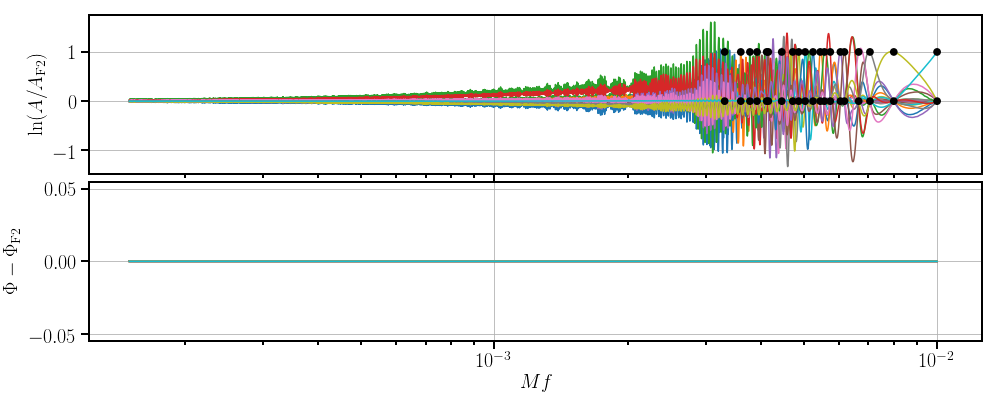

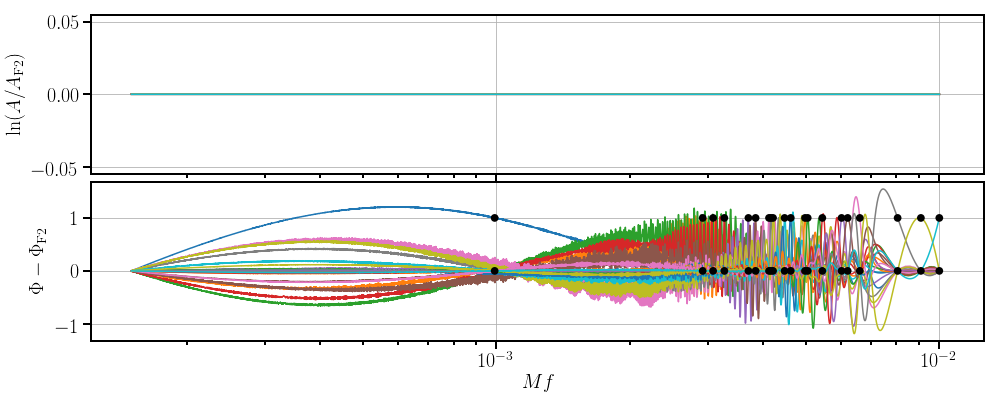

In [15]:
hs = [Bamp_j[j] for j in range(len(Bamp_j))]
mfs = np.array([Bamp_j.get_waveform(j, data='parameters')[0] for j in range(len(Bamp_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax1.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax1.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

hs = [Bphase_j[j] for j in range(len(Bphase_j))]
mfs = np.array([Bphase_j.get_waveform(j, data='parameters')[0] for j in range(len(Bphase_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax2.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax2.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Gaussian processes

In [16]:
# Calculate the amplitude for all waveforms in the training set
# at the amplitude empirical nodes
damp_ts_list = []
for j in range(len(Bamp_j)):
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    damp_ts = np.array([trainset[i].interpolate('amp')(mf) for i in range(len(trainset))])
    damp_ts_list.append(damp_ts)
    
# Calculate the phase for all waveforms in the training set
# at the phase empirical nodes
dphase_ts_list = []
for j in range(len(Bphase_j)):
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    dphase_ts = np.array([trainset[i].interpolate('phase')(mf) for i in range(len(trainset))])
    dphase_ts_list.append(dphase_ts)
    
# Relevant parameters for the training set waveforms
params_ts = trainset.parameters()

In [17]:
#print dphase_ts_list[-1]

In [18]:
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
kernel_type = 'matern52'

damp_gp_list = []
for i in range(len(damp_ts_list)):
    print i
    points = params_ts
    data = damp_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits)
    damp_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(damp_gp)
    damp_gp_list.append(damp_gp)

0
[  3.83480147e-02   1.48079698e+00   4.03670047e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.73694637e-03]
1
[  3.84707554e-02   1.11546703e+00   3.63720393e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   2.76911480e-03]
2
[  3.65505110e-02   1.34683724e+00   3.30692115e+00   5.12349006e+00
   4.00000000e+04   4.00000000e+04   3.34070128e-03]
3
[  3.92740019e-02   1.20465670e+00   2.86222018e+00   5.22479551e+00
   4.00000000e+04   4.00000000e+04   3.95938186e-03]
4
[  4.72193013e-02   1.58762252e+00   2.86435460e+00   4.39526190e+00
   4.00000000e+04   4.00000000e+04   4.88737776e-03]
5
[  4.03069275e-02   1.59024791e+00   1.82255805e+00   2.23887174e+00
   3.30031516e+04   4.00000000e+04   5.13326266e-03]
6
[  3.61981150e-02   1.16381064e+00   1.36683184e+00   1.88180580e+00
   2.56390277e+04   4.00000000e+04   6.43276422e-03]
7
[  2.94215904e-02   2.02271283e-01   5.55195027e-01   9.00893356e-01
   7.44728104e+03   2.71946279e+04   2.66033740e-03]
8
[  3.2

In [19]:
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
kernel_type = 'matern52'

dphase_gp_list = []
for i in range(len(dphase_ts_list)):
    print i
    points = params_ts
    data = dphase_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits, length_scale_factor=[0.1, 10.0], 
                                                             sigma_n_factor=[1.0e-6, 0.1])
    print hyper_limits
    dphase_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(dphase_gp)
    dphase_gp_list.append(dphase_gp)

0
[[  2.36441882e+00   9.45767529e+01]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  2.36441882e-05   2.36441882e+00]]
[  2.60407799e+01   1.44511648e+00   5.65343383e+00   1.27505154e+01
   1.00000000e+05   1.00000000e+05   2.36441882e-05]
1
[[  8.19950248e+00   3.27980099e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  8.19950248e-05   8.19950248e+00]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.72099120e-03,   1.78376956e-03,   6.15310079e-03,
        -4.53042339e+01,   1.20558564e-04,  -1.86501404e+02,
         3.87534721e-04]), 'nit': 34, 'funcalls': 79}
  " state: %s" % convergence_dict)


[  7.17275516e+01   1.32428939e+00   6.90686445e+00   1.40000000e+01
   9.84091653e+04   1.00000000e+05   8.19950248e-05]
2
[[  8.70353746e+00   3.48141498e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  8.70353746e-05   8.70353746e+00]]
[  7.45053090e+01   1.31447535e+00   6.94945919e+00   1.40000000e+01
   9.72879033e+04   1.00000000e+05   8.70353746e-05]
3
[[  9.27943642e+00   3.71177457e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  9.27943642e-05   9.27943642e+00]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.15657109e-04,   7.01141287e-04,   1.18873020e-03,
        -4.96009327e+01,  -1.55895048e-03,  -1.85444275e+02,
         4.07875296e-04]), 'nit': 36, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.81434676e-04,   3.91046672e-04,  -1.15670211e-03,
        -4.96008638e+01,   7.10689407e-04,  -1.85444295e+02,
         4.07875689e-04]), 'nit': 32, 'funcalls': 80}
  " state: %s" % convergence_dict)


[  7.74920527e+01   1.30501575e+00   6.99315679e+00   1.40000000e+01
   9.58881542e+04   1.00000000e+05   9.27943642e-05]
4
[[  1.06388497e+01   4.25553987e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.06388497e-04   1.06388497e+01]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.22639583e-04,  -2.09132882e-03,   1.23707196e-03,
        -5.45628732e+01,  -2.25140845e-03,  -1.84170763e+02,
         4.39456453e-04]), 'nit': 35, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.02115805e-04,  -1.02306616e-03,  -8.77440371e-04,
        -5.45653954e+01,   1.72938148e-03,  -1.84171129e+02,
         5.47681113e-04]), 'nit': 18, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b te

[  8.43916062e+01   1.28179427e+00   7.09561916e+00   1.40000000e+01
   9.32032692e+04   1.00000000e+05   1.06388497e-04]
5
[[  1.10805977e+01   4.43223907e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.10805977e-04   1.10805977e+01]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  7.02085672e-05,   3.02484166e-04,  -3.98851509e-04,
        -5.56179991e+01,   4.46975566e-04,  -1.84175115e+02,
         4.44200859e-04]), 'nit': 39, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.98010821e-05,   6.07315616e-05,  -1.07559988e-04,
        -5.56176326e+01,   2.39935359e-05,  -1.84175055e+02,
         4.44201007e-04]), 'nit': 36, 'funcalls': 115}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b t

[  8.65623559e+01   1.27172678e+00   7.12898913e+00   1.40000000e+01
   9.25007126e+04   1.00000000e+05   1.10805977e-04]
6
[[  1.19526856e+01   4.78107423e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.19526856e-04   1.19526856e+01]]
[  9.04784924e+01   1.25841367e+00   7.18615203e+00   1.40000000e+01
   9.10224243e+04   1.00000000e+05   1.19526856e-04]
7
[[  1.20782214e+01   4.83128857e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.20782214e-04   1.20782214e+01]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.99818751e-04,  -3.00420003e-04,  -1.44480351e-04,
        -5.92564789e+01,   1.12188785e-03,  -1.83241678e+02,
         4.67979403e-04]), 'nit': 35, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.29292146e-04,  -4.37838178e-04,   1.54236415e-04,
        -5.92566555e+01,  -5.17144762e-04,  -1.83241619e+02,
         4.67978201e-04]), 'nit': 35, 'funcalls': 85}
  " state: %s" % convergence_dict)


[  9.13497954e+01   1.25907149e+00   7.21875408e+00   1.40000000e+01
   9.07843137e+04   1.00000000e+05   1.20782214e-04]
8
[[  1.22284496e+01   4.89137984e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.22284496e-04   1.22284496e+01]]
[  9.23703537e+01   1.25646129e+00   7.21293207e+00   1.40000000e+01
   9.05880099e+04   1.00000000e+05   1.22284496e-04]
9
[[  1.30509955e+01   5.22039818e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.30509955e-04   1.30509955e+01]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.89890711e-04,  -5.44384011e-03,   4.41631342e-03,
        -6.23688292e+01,  -6.53164431e-04,  -1.82193381e+02,
         4.76154551e-04]), 'nit': 37, 'funcalls': 82}
  " state: %s" % convergence_dict)


[  9.56924677e+01   1.24305242e+00   7.28567469e+00   1.40000000e+01
   8.91069696e+04   1.00000000e+05   1.30509955e-04]
10
[[  1.35099623e+01   5.40398492e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.35099623e-04   1.35099623e+01]]
[  9.82191462e+01   1.24138567e+00   7.33969171e+00   1.40000000e+01
   8.89208049e+04   1.00000000e+05   1.35099623e-04]
11
[[  1.46413837e+01   5.85655347e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.46413837e-04   1.46413837e+01]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.41606908e-04,   6.33854266e-05,  -4.04967491e-04,
        -6.74314296e+01,   7.97418578e-04,  -1.81379644e+02,
         5.23150670e-04]), 'nit': 27, 'funcalls': 71}
  " state: %s" % convergence_dict)


[  1.02873849e+02   1.22304614e+00   7.39849444e+00   1.40000000e+01
   8.76528175e+04   1.00000000e+05   1.46413837e-04]
12
[[  1.48620101e+01   5.94480404e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.48620101e-04   1.48620101e+01]]
[  1.03777579e+02   1.22007552e+00   7.41928684e+00   1.40000000e+01
   8.69223251e+04   1.00000000e+05   1.48620101e-04]
13
[[  1.61344978e+01   6.45379913e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.61344978e-04   1.61344978e+01]]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.89907702e-03,   7.04363379e-03,   1.41924025e-03,
        -7.07721058e+01,   3.05797704e-03,  -1.80276307e+02,
         5.36605959e-04]), 'nit': 36, 'funcalls': 82}
  " state: %s" % convergence_dict)


[  1.09954155e+02   1.21135317e+00   7.51656494e+00   1.40000000e+01
   8.57951751e+04   1.00000000e+05   1.61344978e-04]
14
[[  1.79787522e+01   7.19150087e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.79787522e-04   1.79787522e+01]]
[  1.16613535e+02   1.18695862e+00   7.62285819e+00   1.40000000e+01
   8.30823820e+04   1.00000000e+05   1.79787522e-04]
15
[[  1.86077754e+01   7.44311018e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.86077754e-04   1.86077754e+01]]
[  1.19995612e+02   1.18241566e+00   7.71196093e+00   1.40000000e+01
   8.35686251e+04   1.00000000e+05   1.86077754e-04]
16
[[  1.99308493e+01   7.97233972e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000

In [20]:
# Save GPR functions
gpr.save_gaussian_process_regression_list(amp_gp_filename, damp_gp_list, 'matern52')
gpr.save_gaussian_process_regression_list(phase_gp_filename, dphase_gp_list, 'matern52')

# Diagnosing GP fit

In [21]:
def symlog_yticks(axes):
    decade = np.array([0.1*i for i in range(10)])
    ticks = []
    for i in range(-1, 2):
        ticks.append(decade*10**i)
    ticks = np.concatenate(np.array(ticks))
    ticks_rev = np.flip(ticks, 0)
    all_ticks = np.concatenate((-ticks_rev, ticks)) 
    axes.set_yticks(all_ticks, minor=True)
    #axes.set_yticks(all_ticks)

In [22]:
dh_testset_uni = ws.HDF5WaveformSet('../data/dh_test_set_uniform_p00015.hdf5')

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


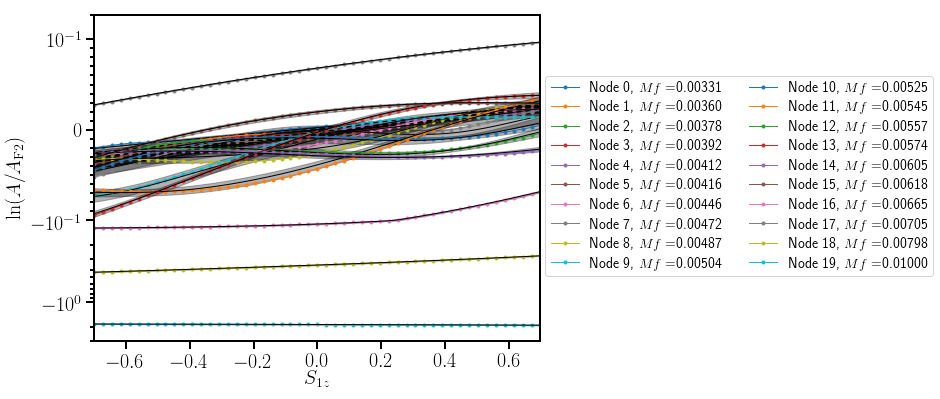

In [23]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(damp_gp_list)):
    # Node frequency
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([dh_testset_uni[i].interpolate('amp')(mf) for i in range(len(dh_testset_uni))])
    damp_gp = damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], damp_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], damp_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_yscale('symlog', linthreshy=0.1)
#axes.set_yticks(ticks, minor=True)
symlog_yticks(axes)
axes.set_ylim(-3, 0.2)
axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\ln(A/A_{\rm F2})$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


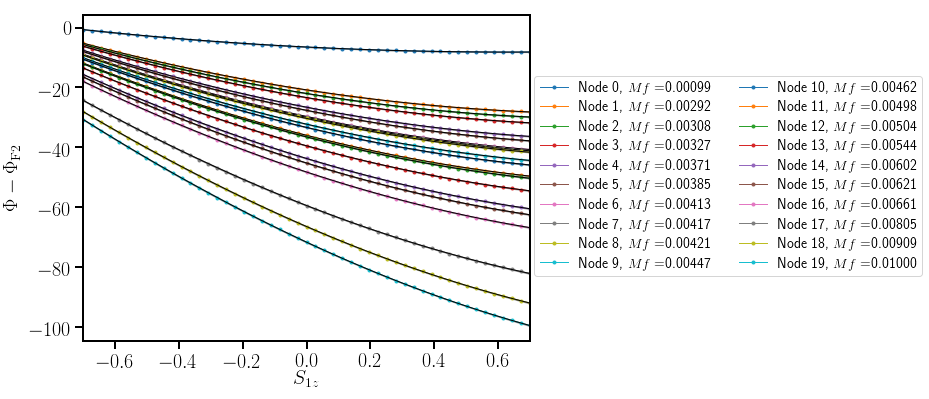

In [24]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(dphase_gp_list)):
    # Node frequency
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([dh_testset_uni[i].interpolate('phase')(mf) for i in range(len(dh_testset_uni))])
    dphase_gp = dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], dphase_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], dphase_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

# Diagnostics (Everything below should go in separate notebooks)

# Plot frequency dependent error estimates

In [167]:
# Bamp_filename = '../data/Bamp.hdf5'
# Bphase_filename = '../data/Bphase.hdf5'
# damp_gp_filename = '../data/amp_gp.hdf5'
# dphase_gp_filename = '../data/phase_gp.hdf5'

# Bamp = ws.HDF5WaveformSet(Bamp_filename)
# Bphase = ws.HDF5WaveformSet(Bphase_filename)
# damp_gp_list = gpr.load_gaussian_process_regression_list(damp_gp_filename)
# dphase_gp_list = gpr.load_gaussian_process_regression_list(dphase_gp_filename)

In [168]:
def error_of_frequency(point, B_j, gp_list, data='amp'):
    jmax = len(B_j)
    eps_f_j = np.array([gp_list[j].predict(np.atleast_2d(point), return_std=True)[1][0] 
                        for j in range(jmax)])
    
    # Get complex version of B_j's in array form
    if data=='amp':
        B_j_array = np.array([B_j[j].amp for j in range(jmax)])
    elif data=='phase':
        B_j_array = np.array([B_j[j].phase for j in range(jmax)])
    else:
        raise Exception

    # Evaluate waveform
    error_arr = np.dot(eps_f_j, B_j_array)

    # Rewrite as TimeDomainWaveform
    xarr = B_j[0].x
    return xarr, error_arr

In [177]:
point = np.array([0.8, 0.3, 0.7, 3455, 2579])
f, eps = error_of_frequency(point, Bamp, damp_gp_list, data='amp')
#f, eps = error_of_frequency(point, Bphase, dphase_gp_list, data='phase')

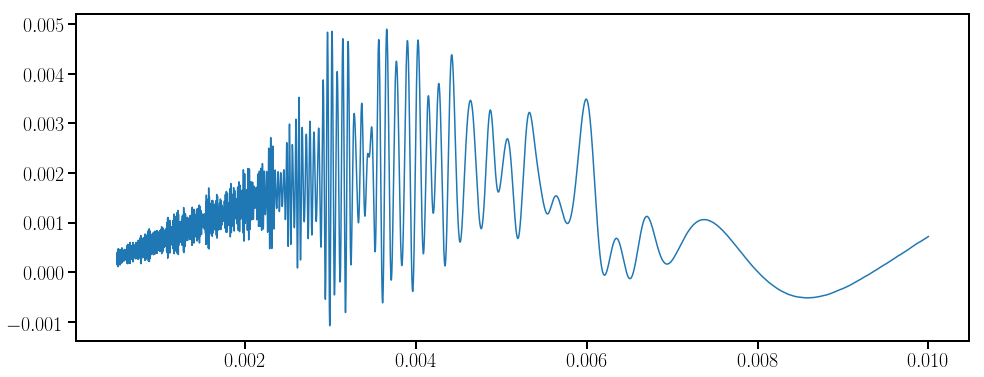

In [178]:
fig, ax1 = plt.subplots(1, figsize=(16, 6))
ax1.plot(f, eps)
#ax1.set_xscale('log')
#ax1.set_xlim(1.0e-4, 0.1)

0.00304761357728


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/lackey/Library/Python/2.7/lib/python/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


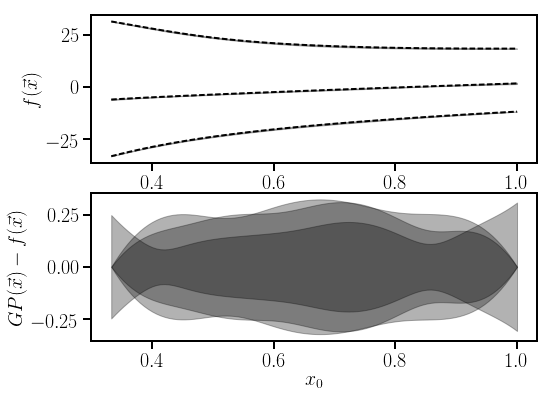

In [184]:
#x2, x3, x4 = 0.0, 2000.0, 2000.0
#x0, x1, x2, x3, x4 = params_rand[i_phasemax]
x0, x1, x2, x3, x4 = 1.0/3.0, -0.7, -0.7, 0.0, 0.0
i = 2
mf = Bphase_j.get_waveform(i, data='parameters')[0]
print mf
gp = dphase_gp_list[i]

fig, ax = plt.subplots(2, figsize=(8, 6))
for x1 in np.linspace(-0.7, 0.7, 3):
    x0s = np.linspace(1.0/3.0, 1.0, 100)
    ps = np.array([[x0, x1, x2, x3, x4] for x0 in x0s])
    
    #true = np.array([func(p) for p in ps])
    #ax[0].plot(xs, true, label=r'$x_1$='+str(x1))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(x0s, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(x0s, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    #ax[1].plot(x0s, (y_pred-true), label=r'$x_1$='+str(x1))
    ax[1].fill_between(x0s, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))